In [55]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/ana/ironhack_coding/datasets/mental_health_in_tech.csv")

This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Assuring column names are all lower case and whitespaces are replace by underscores
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")


In [6]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df.dtypes

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [8]:
df.shape

(1259, 27)

In [9]:
df.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
# will drop the columns where the self-employed column has a value of NaN, since this info might be important for
# later analysis and the number of columns is very low

df.dropna(subset=['self_employed'], how='all', inplace=True)


#### Cleaning age column

In [11]:
# age's min and max are outliers and very humanily impossible
df.describe()

,age
count,1.241000e+03
mean,8.058021e+07
std,2.838665e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [12]:
#instead of using a function for outliers - which would calculate the outliers based on the standard deviation, 
# I will remove the ages that under 20 and above 75 years old. 
# I will assign NaN to the outliers and drop them 
df["age"] = df["age"].apply(lambda age: int(age) if (age > 20 and age < 75) else np.nan)

df["age"].min()
#df.gender_clean.apply(lambda x: re.sub(r"[m]$","male", x))


21.0

In [13]:
df["age"]

18      46.0
19      36.0
20      29.0
21      31.0
22      46.0
        ... 
1254    26.0
1255    32.0
1256    34.0
1257    46.0
1258    25.0
Name: age, Length: 1241, dtype: float64

In [14]:
df["age"].isnull().sum()

30

In [15]:
# dropping rows with NaN values
df.dropna(subset=['age'], how='all', inplace=True)
df["age"].isnull().sum()

0

In [16]:
# after rows being dropped
df.shape

(1211, 27)

In [17]:
# subgroups who are more likely to experience mental health problems
# prejudice against mental health -would different segments talk with their employees?
# relationship between menthal health support programmes and how people feel?
# 

In [18]:
# standardize column gender column

In [19]:
df["gender"].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'Woman', 'f', 'Mal',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'Enby', 'fluid', 'Genderqueer', 'Female ',
       'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Male ', 'Man', 'msle', 'Neuter',
       'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [51]:
#cleaning gender column making sure most of the values are within "male" and "female"
#the other values will be dropped for this analysis
#dropped other values
df["gender"] = df.gender.apply(lambda x: x.lower().strip())
df["gender"] = df.gender_clean.apply(lambda x: re.sub(r"[m]$","male", x))
df["gender"] = df.gender_clean.apply(lambda x: re.sub(r"[f]$","female", x))


df = df[(df["gender"] == "male") | (df["gender"] == "female")]

df["gender"].value_counts()



male      939
female    230
Name: gender, dtype: int64

### Calculate percentages

In [68]:
# Men vs women
(df.groupby('gender').size()/df['gender'].count())*100


gender
female    19.674936
male      80.325064
dtype: float64

####  Gender vs perception/shame etc


mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

In [23]:
df["mental_health_consequence"].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [24]:
# Do men and women have different attitutes towards talking about 
# mental health problems with their employer
# use percentages

NameError: name 'plt' is not defined

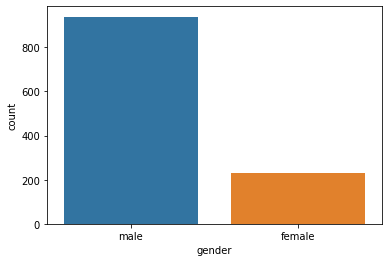

In [54]:
sns.countplot(x="gender",data= df)

# there's a lot more men in tech

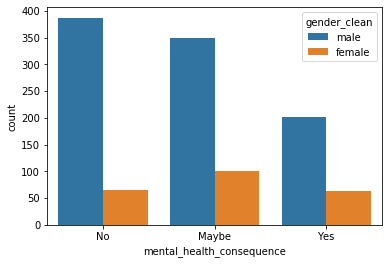

In [52]:


ax = sns.countplot(x="mental_health_consequence", data= df, hue="gender_clean")
